## Simspsons Characters

In [ ]:
import os
import caer
import numpy as np 
import pandas as pd
import cv2
import gc

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Keep image size to 80x80
IMG_SIZE = (80, 80)

#Define number of channels
channels = 1 # A grayscale image

In [ ]:
path = r"E:\OpenCV Guide\Section Four\Final Part\simpsons_dataset"

In [ ]:
char_dict = {}
for char in os.listdir(path):
    char_dict[char] = len(os.listdir(os.path.join(path, char)))

# Now sorting the dictionary in descending order based on number of images
char_dict = caer.sort_dict(char_dict, descending = True)
#char_dict = dict(char_dict[:10]) # Keeping only top 10 characters
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [ ]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

# Creating training data

In [ ]:
train = caer.preprocess_from_dir(path, characters, IMG_SIZE=IMG_SIZE, channels = channels, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.005009889602661133s
[INFO] At 1000 files
[INFO] 1454 files found in 0.003011465072631836s
[INFO] At 1000 files
[INFO] 1452 files found in 0.0030002593994140625s
[INFO] At 1000 files
[INFO] 1354 files found in 0.004003286361694336s
[INFO] At 1000 files
[INFO] 1342 files found in 0.005003452301025391s
[INFO] At 1000 files
[INFO] 1291 files found in 0.003016233444213867s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0040607452392578125s
[INFO] At 1000 files
[INFO] 1194 files found in 0.003103971481323242s
[INFO] At 1000 files
[INFO] 1193 files found in 0.0031120777130126953s
[INFO] At 1000 files
[INFO] 1079 files found in 0.003113269805908203s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 20s


In [ ]:
len(train)

13811

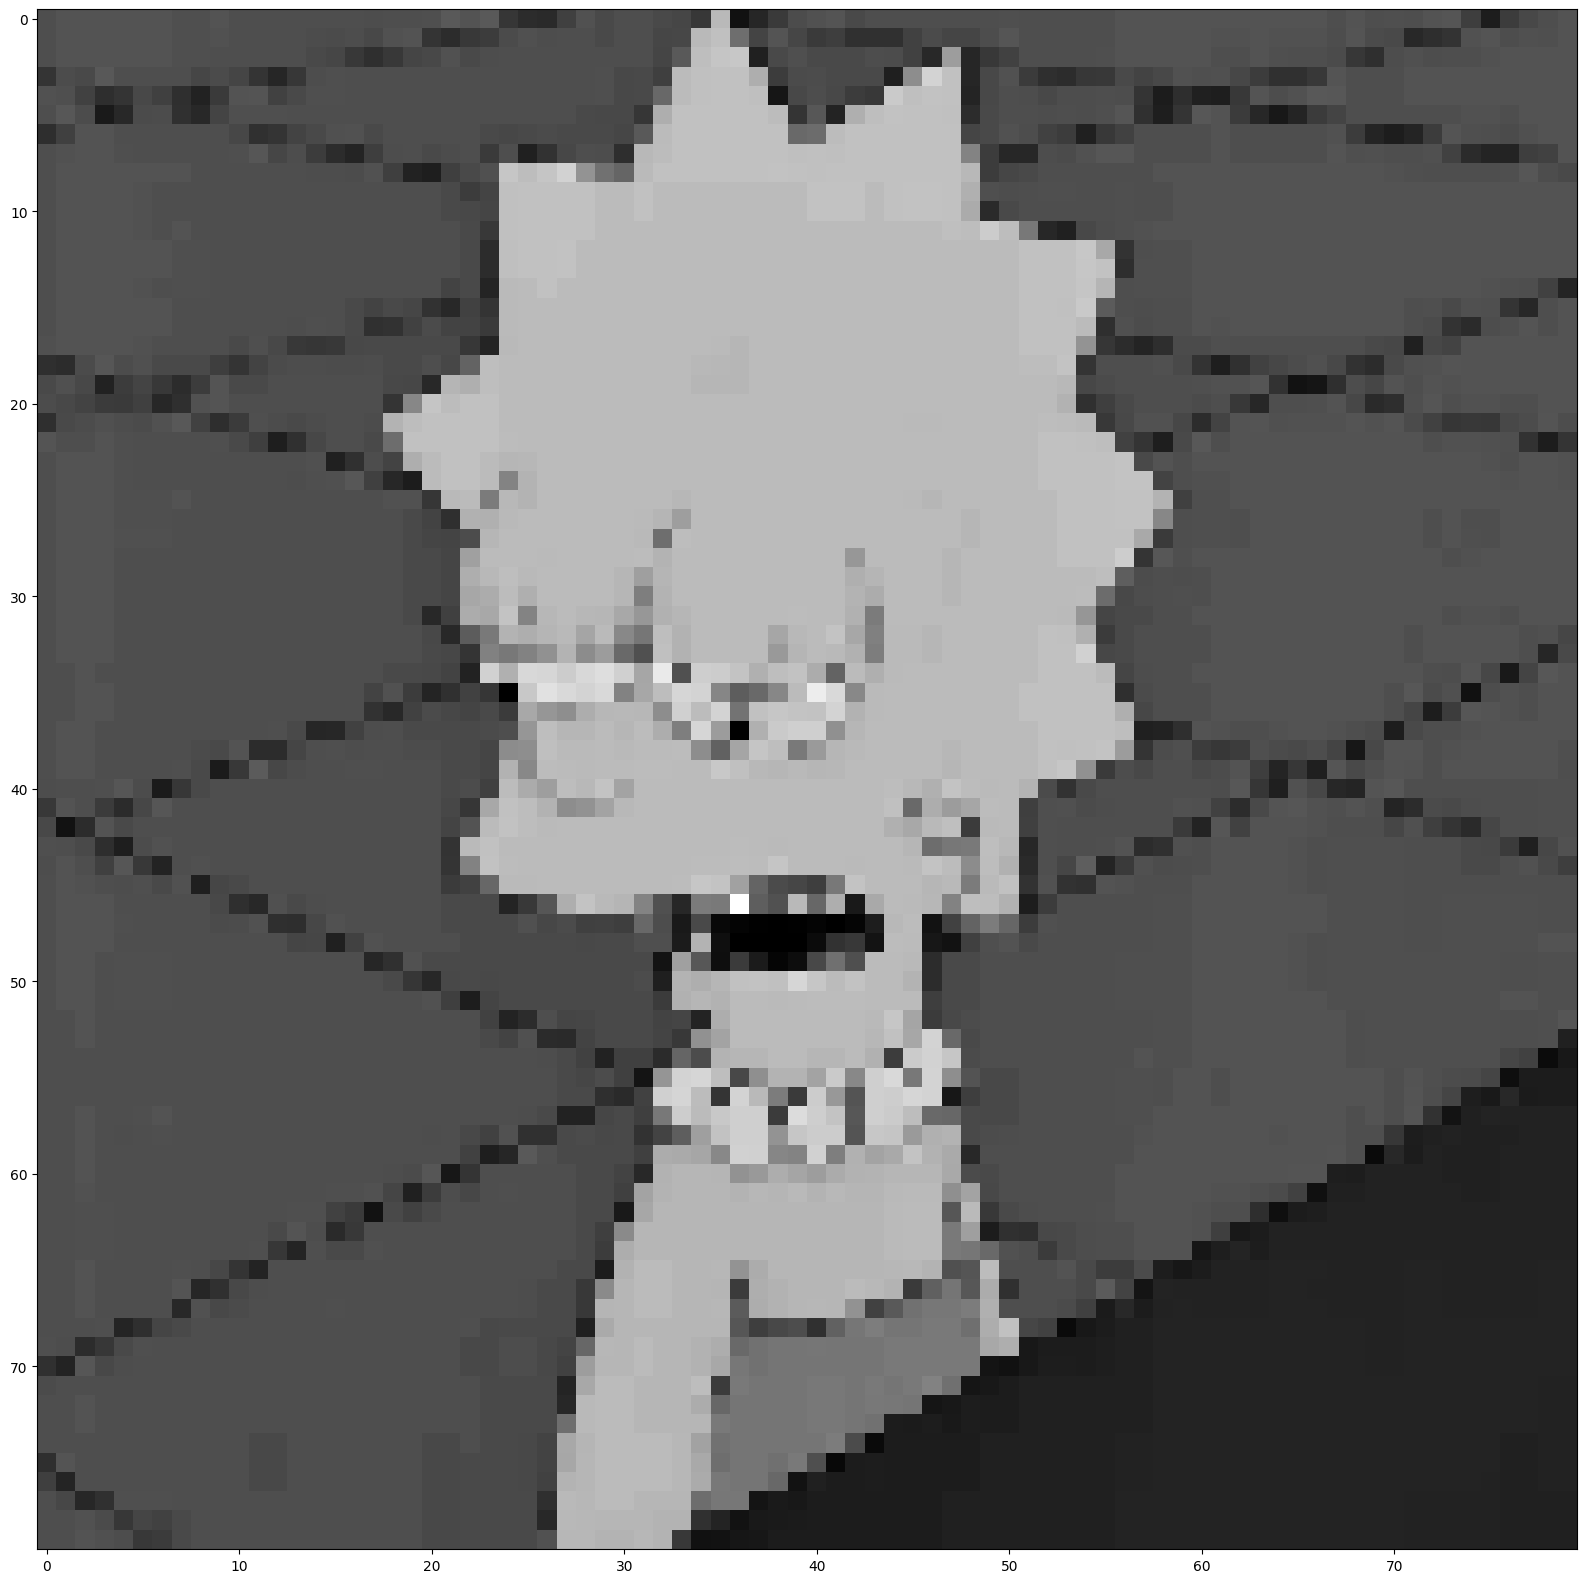

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [ ]:
# Now separate the training set into features and labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [ ]:
# Normalizing the feature set in the range of 0 to 1
from tensorflow.keras.utils import to_categorical
featureSet = caer.normalize(featureSet) 
# we don't need to normalize the labels as they are categorical values but we will one-hot encode them using to_categorical
labels = to_categorical(labels, len(characters))


In [ ]:
x_train, x_test, y_train, y_test = caer.train_val_split(featureSet, labels, val_ratio=0.2)


In [ ]:
# Cleaning up the memory
del train
del featureSet
del labels
gc.collect()

126

In [ ]:
# Making an Image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen =  canaro.generators.imageDatagenerator()
train_generator = datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
#Creating the model

